## K-Mean 
## Alaa Elsayed Mohamed Desukey

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df1 = df.iloc[:,1:-1]
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
x=df1.iloc[:,0]
y=df1.iloc[:,1]
print(x,y)

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLengthCm, Length: 150, dtype: float64 0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: SepalWidthCm, Length: 150, dtype: float64


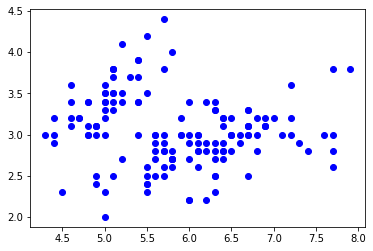

In [6]:
plt.scatter(x,y, c = 'b')
plt.show()

centroids =  [[4.88242895 3.08711808]
 [4.96763456 3.60625337]
 [4.7735877  2.21546505]]


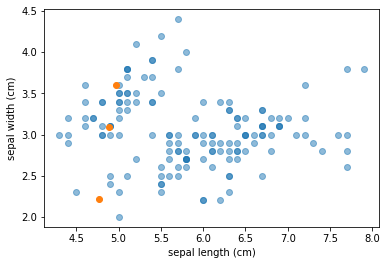

In [7]:
# centroid
k = 3
 
centroids_x = np.random.uniform(min(x), max(x), size=k)
centroids_y = np.random.uniform(min(y), max(y), size=k)
 
centroids = np.array(list(zip(centroids_x, centroids_y)))
print("centroids = ", centroids)
 
plt.scatter(x, y, alpha=0.5)
plt.scatter(centroids_x, centroids_y)
 
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
 
plt.show()

In [8]:
sepal_length_width = np.array(list(zip(x, y)))
# distances 
def distance(a, b):
    one = (a[0] - b[0]) ** 2
    two = (a[1] - b[1]) ** 2
    distance = (one+two) ** 0.5
    return distance
    
labels = np.zeros(len(df1))
# Distances for each centroid
distances = np.zeros(k)

for i in range(len(df1)):
    distances[0] = distance(sepal_length_width[i], centroids[0])
    distances[1] = distance(sepal_length_width[i], centroids[1])
    distances[2] = distance(sepal_length_width[i], centroids[2])
    cluster = np.argmin(distances) 
    labels[i] = cluster
print(labels)

[1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 2. 0. 1. 1. 0. 1. 0.
 1. 0. 1. 1. 1. 2. 0. 0. 1. 2. 0. 0. 2. 0. 2. 0. 0. 1. 0. 0. 2. 2. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 0. 0. 0. 1. 1. 2. 0. 2. 0. 0. 0. 2. 0. 0.
 0. 0. 2. 0. 1. 0. 1. 0. 0. 1. 2. 0. 0. 1. 1. 0. 0. 2. 0. 1. 0. 1. 0. 2.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1.
 1. 0. 0. 0. 1. 0.]


In [9]:
# update centeroids
from copy import deepcopy
centroids_old = deepcopy(centroids)

for i in range(k):
    points = []
    for j in range(len(sepal_length_width)):
        if labels[j] == i:
            points.append(sepal_length_width[j])
    centroids[i] = np.mean(points, axis=0)

print("centroids_old=" , centroids_old)
print("centroids_new=",centroids)

centroids_old= [[4.88242895 3.08711808]
 [4.96763456 3.60625337]
 [4.7735877  2.21546505]]
centroids_new= [[5.81168831 2.9038961 ]
 [5.99649123 3.45614035]
 [5.45       2.34375   ]]


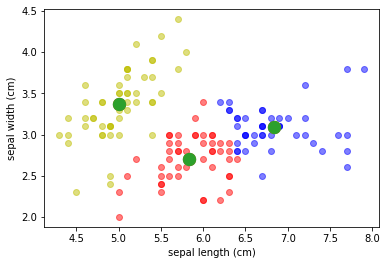

In [11]:
error = np.zeros(3)
error = np.zeros(3)
error[0] = distance(centroids[0], centroids_old[0])
error[1] = distance(centroids[1], centroids_old[1])
error[2] = distance(centroids[2], centroids_old[2])

#Assign data to nearest centroid
while error.all() != 0:
  for i in range(len(df1)):
    distances[0] = distance(sepal_length_width[i], centroids[0])
    distances[1] = distance(sepal_length_width[i], centroids[1])
    distances[2] = distance(sepal_length_width[i], centroids[2])
    cluster = np.argmin(distances)
    labels[i] = cluster

  centroids_old = deepcopy(centroids)
 
  for i in range(3):
    points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
    centroids[i] = np.mean(points, axis=0)
 
  # Add this again:
 
  error[0] = distance(centroids[0], centroids_old[0])
  error[1] = distance(centroids[1], centroids_old[1])
  error[2] = distance(centroids[2], centroids_old[2])

colors = ['r','b','y']
 
for i in range(k):
  points = np.array([sepal_length_width[j] for j in range(len(df1)) if labels[j] == i])
  plt.scatter(points[:, 0], points[:, 1], c=colors[i], alpha=0.5)

  plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=150)
 
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
 
plt.show()

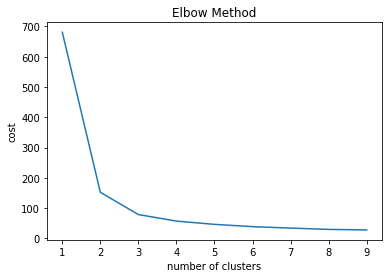

In [12]:
#The elbow method is used to get the optimum value of K in K-means. 
from sklearn.cluster import KMeans
cost_fun=[]
k_range=range(1,10)
for k in k_range:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df1)
    cost_fun.append(kmeans.inertia_)

plt.plot(k_range,cost_fun)
plt.title("Elbow Method")
plt.xlabel("number of clusters")
plt.ylabel("cost")
plt.show()

centroids =  [[5.45475154 2.26899843]
 [4.96859834 3.8782135 ]
 [7.30007778 4.0769009 ]
 [5.169401   3.98276504]]


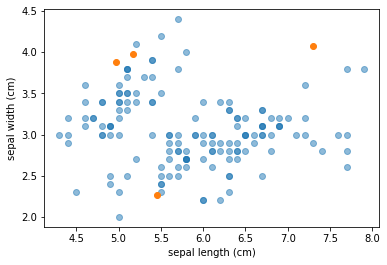

In [19]:
# centroid
k = 4
 
centroids_x = np.random.uniform(min(x), max(x), size=k)
centroids_y = np.random.uniform(min(y), max(y), size=k)
 
centroids = np.array(list(zip(centroids_x, centroids_y)))
print("centroids = ", centroids)
 
plt.scatter(x, y, alpha=0.5)
plt.scatter(centroids_x, centroids_y)
 
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
 
plt.show()

In [20]:
sepal_length_width = np.array(list(zip(x, y)))
# distances 
def distance(a, b):
    one = (a[0] - b[0]) ** 2
    two = (a[1] - b[1]) ** 2
    distance = (one+two) ** 0.5
    return distance
    
labels = np.zeros(len(df1))
# Distances for each centroid
distances = np.zeros(k)

for i in range(len(df1)):
    distances[0] = distance(sepal_length_width[i], centroids[0])
    distances[1] = distance(sepal_length_width[i], centroids[1])
    distances[2] = distance(sepal_length_width[i], centroids[2])
    distances[3] = distance(sepal_length_width[i], centroids[3])
    cluster = np.argmin(distances) 
    labels[i] = cluster
print(labels)

[1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 3. 1. 1. 1. 3. 3. 3. 1. 3. 1. 3. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 3. 3. 3. 1. 1. 3. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 3. 1. 2. 2. 2. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 2. 2. 2. 0. 0. 0. 0. 0. 0. 0. 3. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 2. 0. 2. 0. 0. 2. 0. 2. 0. 2. 2. 0. 2. 0. 0. 2. 0. 2. 2. 0.
 2. 0. 2. 0. 2. 2. 0. 0. 0. 2. 2. 2. 0. 0. 0. 2. 2. 0. 0. 2. 2. 2. 0. 2.
 2. 2. 0. 0. 3. 0.]


In [21]:
# update centeroids
from copy import deepcopy
centroids_old = deepcopy(centroids)

for i in range(k):
    points = []
    for j in range(len(sepal_length_width)):
        if labels[j] == i:
            points.append(sepal_length_width[j])
    centroids[i] = np.mean(points, axis=0)

print("centroids_old=" , centroids_old)
print("centroids_new=",centroids)

centroids_old= [[5.45475154 2.26899843]
 [4.96859834 3.8782135 ]
 [7.30007778 4.0769009 ]
 [5.169401   3.98276504]]
centroids_new= [[5.86515152 2.71212121]
 [4.86388889 3.32222222]
 [6.95294118 3.13823529]
 [5.56428571 3.77142857]]


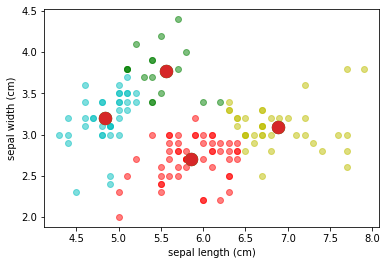

In [22]:
error = np.zeros(4)
error = np.zeros(4)
error[0] = distance(centroids[0], centroids_old[0])
error[1] = distance(centroids[1], centroids_old[1])
error[2] = distance(centroids[2], centroids_old[2])
error[3] = distance(centroids[3], centroids_old[3])

#Assign data to nearest centroid
while error.all() != 0:
  for i in range(len(df1)):
    distances[0] = distance(sepal_length_width[i], centroids[0])
    distances[1] = distance(sepal_length_width[i], centroids[1])
    distances[2] = distance(sepal_length_width[i], centroids[2])
    distances[3] = distance(sepal_length_width[i], centroids[3])
    cluster = np.argmin(distances)
    labels[i] = cluster

  centroids_old = deepcopy(centroids)
 
  for i in range(3):
    points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
    centroids[i] = np.mean(points, axis=0)
 
  # Add this again:
 
  error[0] = distance(centroids[0], centroids_old[0])
  error[1] = distance(centroids[1], centroids_old[1])
  error[2] = distance(centroids[2], centroids_old[2])
  error[3] = distance(centroids[3], centroids_old[3])

colors = ['r','c','y','g']
 
for i in range(k):
  points = np.array([sepal_length_width[j] for j in range(len(df1)) if labels[j] == i])
  plt.scatter(points[:, 0], points[:, 1], c=colors[i], alpha=0.5)

  plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=150)
 
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
 
plt.show()

centroids =  [[7.75889172 3.46226334]
 [6.85977234 2.12247378]
 [5.14402173 2.24987952]
 [4.38855121 3.04622341]
 [7.87539127 2.3935146 ]]


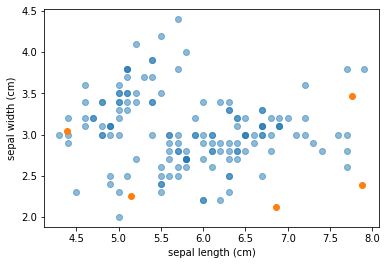

In [23]:
# centroid
k = 5
 
centroids_x = np.random.uniform(min(x), max(x), size=k)
centroids_y = np.random.uniform(min(y), max(y), size=k)
 
centroids = np.array(list(zip(centroids_x, centroids_y)))
print("centroids = ", centroids)
 
plt.scatter(x, y, alpha=0.5)
plt.scatter(centroids_x, centroids_y)
 
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
 
plt.show()

In [24]:
sepal_length_width = np.array(list(zip(x, y)))
# distances 
def distance(a, b):
    one = (a[0] - b[0]) ** 2
    two = (a[1] - b[1]) ** 2
    distance = (one+two) ** 0.5
    return distance
    
labels = np.zeros(len(df1))
# Distances for each centroid
distances = np.zeros(k)

for i in range(len(df1)):
    distances[0] = distance(sepal_length_width[i], centroids[0])
    distances[1] = distance(sepal_length_width[i], centroids[1])
    distances[2] = distance(sepal_length_width[i], centroids[2])
    distances[3] = distance(sepal_length_width[i], centroids[3])
    distances[4] = distance(sepal_length_width[i], centroids[4])
    cluster = np.argmin(distances) 
    labels[i] = cluster
print(labels)

[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 2. 3. 3. 3. 3. 3. 3.
 3. 3. 0. 1. 0. 2. 1. 2. 1. 2. 1. 2. 2. 2. 2. 1. 2. 1. 2. 2. 1. 2. 2. 1.
 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 1. 2. 2. 2. 2.
 2. 1. 2. 2. 1. 2. 0. 1. 1. 0. 2. 0. 1. 0. 1. 1. 1. 2. 2. 1. 1. 0. 4. 2.
 0. 2. 4. 1. 0. 0. 1. 1. 1. 0. 4. 0. 1. 1. 1. 0. 1. 1. 2. 0. 1. 0. 2. 0.
 0. 1. 1. 1. 1. 2.]


In [25]:
# update centeroids
from copy import deepcopy
centroids_old = deepcopy(centroids)

for i in range(k):
    points = []
    for j in range(len(sepal_length_width)):
        if labels[j] == i:
            points.append(sepal_length_width[j])
    centroids[i] = np.mean(points, axis=0)

print("centroids_old=" , centroids_old)
print("centroids_new=",centroids)

centroids_old= [[7.75889172 3.46226334]
 [6.85977234 2.12247378]
 [5.14402173 2.24987952]
 [4.38855121 3.04622341]
 [7.87539127 2.3935146 ]]
centroids_new= [[7.15882353 3.22352941]
 [6.4        2.9097561 ]
 [5.595      2.68      ]
 [5.01632653 3.44081633]
 [7.6        2.73333333]]


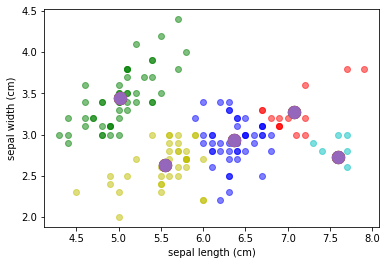

In [28]:
error = np.zeros(5)
error = np.zeros(5)
error[0] = distance(centroids[0], centroids_old[0])
error[1] = distance(centroids[1], centroids_old[1])
error[2] = distance(centroids[2], centroids_old[2])
error[3] = distance(centroids[3], centroids_old[3])
error[4] = distance(centroids[4], centroids_old[4])

#Assign data to nearest centroid
while error.all() != 0:
  for i in range(len(df1)):
    distances[0] = distance(sepal_length_width[i], centroids[0])
    distances[1] = distance(sepal_length_width[i], centroids[1])
    distances[2] = distance(sepal_length_width[i], centroids[2])
    distances[3] = distance(sepal_length_width[i], centroids[3])
    distances[4] = distance(sepal_length_width[i], centroids[4])
    cluster = np.argmin(distances)
    labels[i] = cluster

  centroids_old = deepcopy(centroids)
 
  for i in range(3):
    points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
    centroids[i] = np.mean(points, axis=0)
 
  # Add this again:
 
  error[0] = distance(centroids[0], centroids_old[0])
  error[1] = distance(centroids[1], centroids_old[1])
  error[2] = distance(centroids[2], centroids_old[2])
  error[3] = distance(centroids[3], centroids_old[3])
  error[4] = distance(centroids[4], centroids_old[4])

colors = ['r','b','y','g','c']
 
for i in range(k):
  points = np.array([sepal_length_width[j] for j in range(len(df1)) if labels[j] == i])
  plt.scatter(points[:, 0], points[:, 1], c=colors[i], alpha=0.5)

  plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=150)
 
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
 
plt.show()